## Join the four CSV files into a single data frame

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

orders = pd.read_csv(r"C:\Users\aqual\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv", encoding='latin1')
order_details = pd.read_csv(r"C:\Users\aqual\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv", encoding='latin1')
pizzas = pd.read_csv(r"C:\Users\aqual\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv", encoding='latin1')
pizza_types = pd.read_csv(r"C:\Users\aqual\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding='latin1')

In [17]:
df = order_details.merge(orders, on='order_id')
df = df.merge(pizzas, on='pizza_id')
df = df.merge(pizza_types, on='pizza_type_id')

In [18]:
df['order_date'] = pd.to_datetime(df['date'])
df['total_price'] = df['price'] * df['quantity']
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()

In [20]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Pizza Place Sales

#### What is the total revenue/sales?

In [22]:
total_revenue = df['total_price'].sum()
total_revenue

# Assessing total revenue from pizza sales provides insight into business performance. Increased revenue could suggest successful sales tactics or strategic pricing adjustments.

817860.05

#### Find the total quantity sold.

In [25]:
df['quantity'].sum()

# This figure indicates the quantity of pizzas sold, serving as a measure of customer demand independent of pricing strategies.

49574

#### Find the total orders.

In [24]:
df['order_id'].nunique()

# The total count of unique orders provides insight into the number of customers served by the business.

21350

#### How many pizza types do they sell?

In [26]:
pizza_types['pizza_type_id'].nunique()

# This helps in analyzing the menu variety and assessing how product range can influence customer decisions or operational complexity.

32

#### Find the average price of the pizzas.

In [27]:
pizzas['price'].mean()

# Understanding the average price is useful for comparing revenue and sales volume. If the average price is low but revenue remains high, it suggests strong sales volume.

16.440625

#### What are the peak hours of sales?

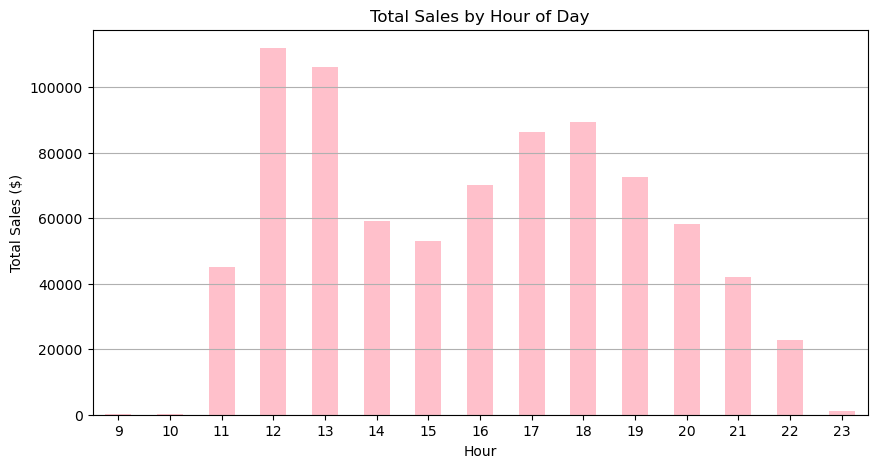

In [30]:
plt.figure(figsize=(10, 5))
df.groupby('hour')['total_price'].sum().plot(kind='bar', color='pink')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# This highlights peak ordering times, with lunch and dinner hours likely being the busiest. Staffing and preparation should be optimized accordingly.

#### Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

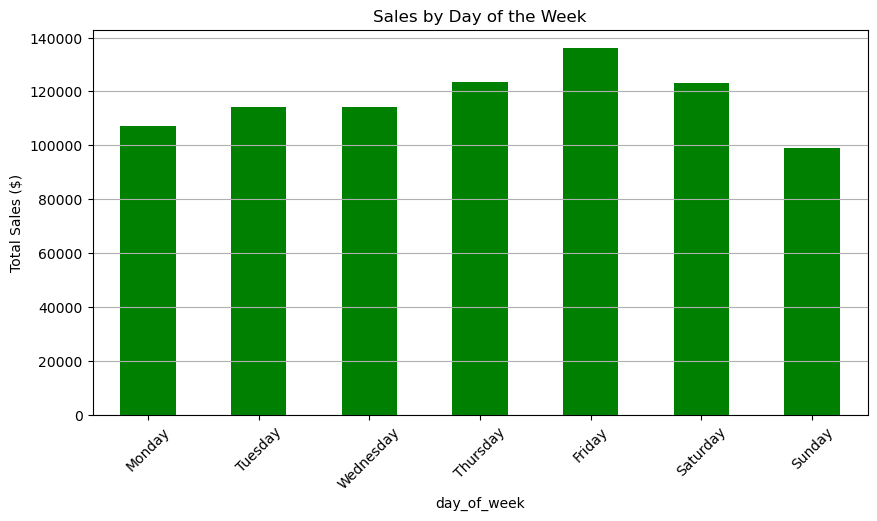

In [32]:
plt.figure(figsize=(10, 5))
df.groupby('day_of_week')['total_price'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', color='green')
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# These products are popular with customers, so management should consider highlighting them in promotions or incorporating them into special bundles for increased sales.

#### Find the top 5 bestselling pizzas.

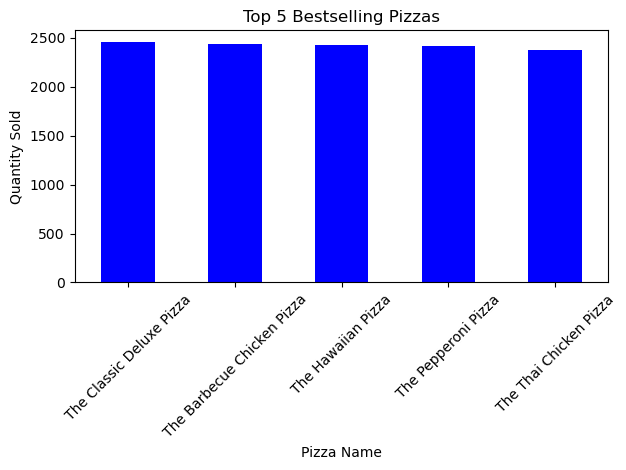

In [33]:
top_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
top_5.plot(kind='bar', title='Top 5 Bestselling Pizzas', color='blue')
plt.ylabel('Quantity Sold')
plt.xlabel('Pizza Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Find the sales made in each month. Any trend noticeable?

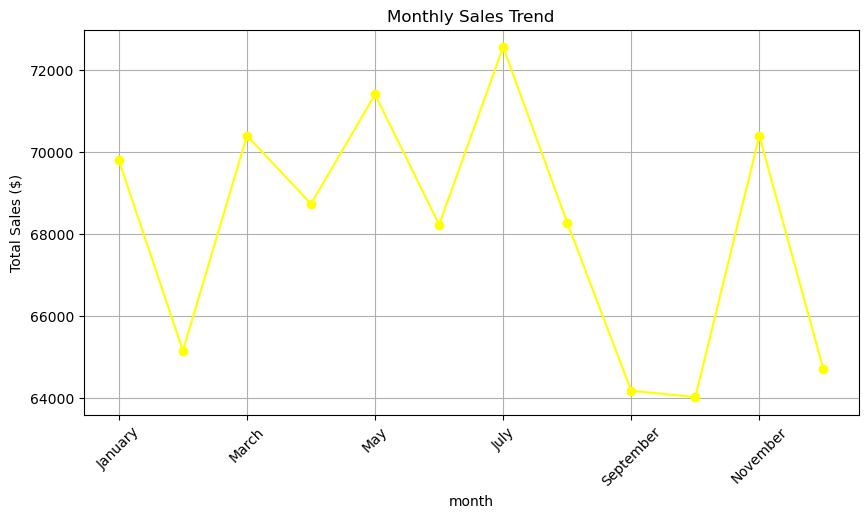

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: total_price, dtype: float64

In [34]:
monthly_sales = df.groupby('month')['total_price'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_sales.plot(kind='line', marker='o', figsize=(10,5), color='yellow')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
monthly_sales

Sales are highest on the months of July followed by May which shows that the sals are affected by weather conditions. 
The trend also shows that the salepeople become lax once the sales are achieved in one month by the irregularity of achieving sales goals.

#### Are there pizza types that are not doing well on the menu?

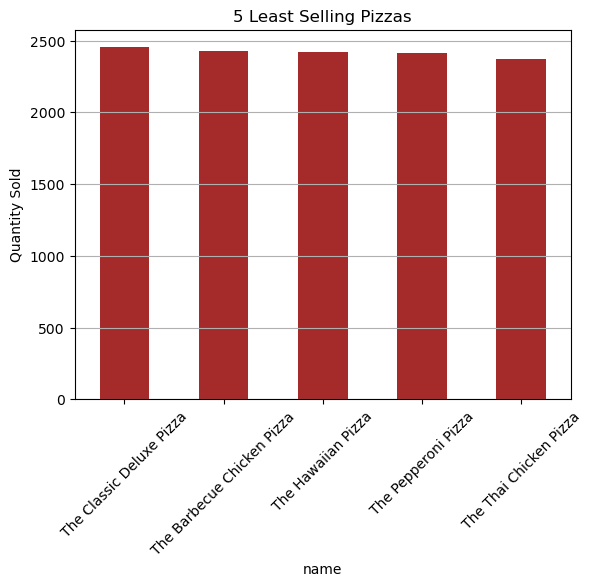

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

In [37]:
bottom_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
bottom_5.plot(kind='bar', title='5 Least Selling Pizzas', color='brown')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
bottom_5